In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from math import sqrt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

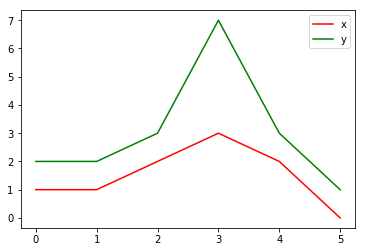

In [22]:
x = np.array([1, 1, 2, 3, 2, 0])
y = np.array([2, 2, 3, 7, 3, 1])

plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend()

In [15]:
def rescale_(values, scaler):
    values = values.reshape((len(values), 1))
    # train the standardization
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    return normalized

### Normalize

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized = rescale_(y, scaler)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

for i in range(5):
    print(normalized[i])

Min: 1.000000, Max: 7.000000
[0.16666667]
[0.16666667]
[0.33333333]
[1.]
[0.33333333]


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


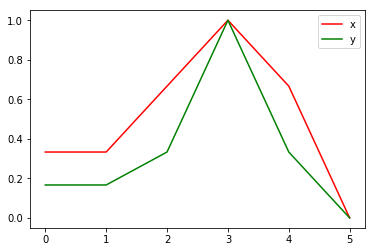

In [25]:
x = np.array([1, 1, 2, 3, 2, 0])
y = np.array([2, 2, 3, 7, 3, 1])

scaler = MinMaxScaler(feature_range=(0, 1))
x_normalized = rescale_(x, scaler)
y_normalized = rescale_(y, scaler)

plt.plot(x_normalized,'r', label='x')
plt.plot(y_normalized, 'g', label='y')
plt.legend()

### Standardize

In [17]:
scaler = StandardScaler()
normalized = rescale_(y, scaler)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
    
for i in range(5):
    print(normalized[i])

Mean: 3.000000, StandardDeviation: 1.914854
[-0.52223297]
[-0.52223297]
[0.]
[2.08893187]
[0.]


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


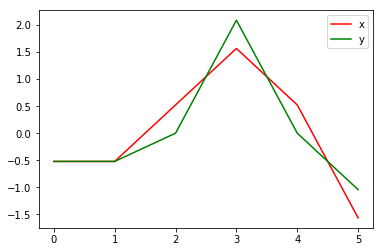

In [21]:
x = np.array([1, 1, 2, 3, 2, 0])
y = np.array([2, 2, 3, 7, 3, 1])

scaler = StandardScaler()
x_standardized = rescale_(x, scaler)
y_standardized = rescale_(y, scaler)

plt.plot(x_standardized,'r', label='x')
plt.plot(y_standardized, 'g', label='y')
plt.legend()